# Exponential equation

$$\frac{df}{dt} = \alpha f(t)$$

In [18]:
using DifferentialEquations

In [15]:
f(u,p,t) = 1.01*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8);

In [16]:
using Plots

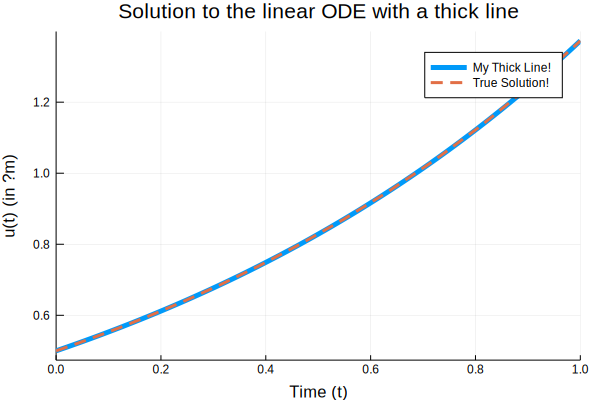

In [17]:
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

# DifferentialEquations.jl + Measurements.jl

In [20]:
# De https://youtu.be/OfMP5PTFQk0?t=1089
using Measurements, DifferentialEquations, Plots

In [21]:
using Plots

In [24]:
g = 9.79 ± 0.02 # gravitational constant
L = 1.00 ± 0.01 # length of the pendulum

u0 = [0 ± 0, π/60 ± 0.01]
tspan = (0.0 ± 0, 6.3 ± 0)

# def the problem
function pendulum(du, u, p, t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L) * θ
end

prob = ODEProblem(pendulum, u0, tspan)

sol = solve(prob, Tsit5(), reltol = 1e-6);

In [31]:
u = u0[2] .* cos.(sqrt(g/L) .* sol.t);

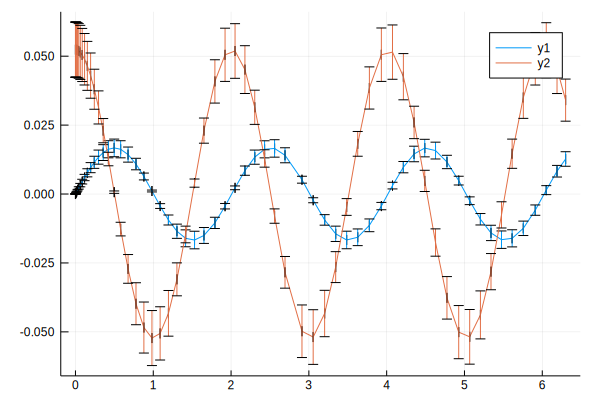

In [32]:
plot(sol.t, [u[1] for u in sol.u])
plot!(sol.t, u)

In [25]:
using DifferentialEquations, Measurements # Load the packages
α = (1.01 ± 0.01) # Define the α parameter as a number with uncertainty
f(t, u) = α * u # Define the f function
u0 = 1/2 ± 0 # The initial value of the Cauchy problem
tspan = (0.0 ± 0, 1.0 ± 0) # The extrema of the domain in which we want to solve the equation
prob = ODEProblem(f, u0, tspan) # Define the ODEProblem
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8); # Solve the problem

In [26]:
u = u0 .* exp.(α .* sol.t);

In [27]:
for i in eachindex(sol)
    println("At time ", Measurements.value(sol.t[i]), ":\n", sol[i], "\n", u[i], "\n")
end

At time 0.0:
0.5 ± 0.0
0.5 ± 0.0

At time 0.012407826196308189:
0.5063053789114713 ± 0.0
0.5063053789114712 ± 6.282149143789496e-5

At time 0.04250126761855906:
0.5219304694466746 ± 0.0
0.5219304694466597 ± 0.00022182706560232646

At time 0.08178095409316789:
0.5430529679557883 ± 0.0
0.5430529679557007 ± 0.00044411389842543734

At time 0.1288740688696744:
0.5695069052828173 ± 0.0
0.5695069052825127 ± 0.0007339467213313368

At time 0.18409822916557567:
0.6021745237652824 ± 0.0
0.6021745237644085 ± 0.0011085926347365147

At time 0.24627490520953021:
0.6412027776534095 ± 0.0
0.6412027776513428 ± 0.0015791215328617193

At time 0.31479322425706907:
0.6871476952527507 ± 0.0
0.6871476952484602 ± 0.002163094385280767

At time 0.38859648220825355:
0.7403259376157145 ± 0.0
0.7403259376077451 ± 0.002876880550418968

At time 0.46686141182058505:
0.8012220497971373 ± 0.0
0.8012220497835487 ± 0.0037405965734373064

At time 0.548715421192569:
0.8702762359614234 ± 0.0
0.8702762359398212 ± 0.0047753399